In [1]:
# Early WIP

In [2]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary (:

colors = [MC, '#17b5ff', 'navy', 'red', 'pink']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [3]:
df = pd.read_csv(ZipFile('data/used-cars-database.zip').open('autos.csv'),
                encoding='Latin1', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46


In [4]:
df.columns

new_columns = ['DateCrawled', 'Name', 'Seller', 'OfferType', 'Price', 'ABTest',
              'VehicleType', 'Year', 'Gearbox', 'PowerPS',
              'Model', 'KM', 'Month', 'FuelType', 'Brand',
              'NotRepairedDemage', 'DateCreated', 'Pictures', 'PostalCode',
              'LastSeen']
df.columns = new_columns
df.head()

,DateCrawled,Name,Seller,OfferType,Price,ABTest,VehicleType,Year,Gearbox,PowerPS,Model,KM,Month,FuelType,Brand,NotRepairedDemage,DateCreated,Pictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
DateCrawled          371528 non-null datetime64[ns]
Name                 371528 non-null object
Seller               371528 non-null object
OfferType            371528 non-null object
Price                371528 non-null int64
ABTest               371528 non-null object
VehicleType          333659 non-null object
Year                 371528 non-null int64
Gearbox              351319 non-null object
PowerPS              371528 non-null int64
Model                351044 non-null object
KM                   371528 non-null int64
Month                371528 non-null int64
FuelType             338142 non-null object
Brand                371528 non-null object
NotRepairedDemage    299468 non-null object
DateCreated          371528 non-null datetime64[ns]
Pictures             371528 non-null int64
PostalCode           371528 non-null int64
LastSeen             371528 non-null datetim

In [6]:
df.describe()

,Price,Year,PowerPS,KM,Month,Pictures,PostalCode
count,"371,528.00","371,528.00","371,528.00","371,528.00","371,528.00","371,528.00","371,528.00"
mean,"17,295.14","2,004.58",115.55,"125,618.69",5.73,0.00,"50,820.67"
std,"3,587,953.74",92.87,192.14,"40,112.34",3.71,0.00,"25,799.08"
min,0.00,"1,000.00",0.00,"5,000.00",0.00,0.00,"1,067.00"
25%,"1,150.00","1,999.00",70.00,"125,000.00",3.00,0.00,"30,459.00"
50%,"2,950.00","2,003.00",105.00,"150,000.00",6.00,0.00,"49,610.00"
75%,"7,200.00","2,008.00",150.00,"150,000.00",9.00,0.00,"71,546.00"
max,"2,147,483,647.00","9,999.00","20,000.00","150,000.00",12.00,0.00,"99,998.00"


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,371528,233531,Ford_Fiesta,657
Seller,371528,2,privat,371525
OfferType,371528,2,Angebot,371516
ABTest,371528,2,test,192585
VehicleType,333659,8,limousine,95894
Gearbox,351319,2,manuell,274214
Model,351044,251,golf,30070
FuelType,338142,7,benzin,223857
Brand,371528,40,volkswagen,79640
NotRepairedDemage,299468,2,nein,263182


In [10]:
df.isnull().sum()

DateCrawled              0
Name                     0
Price                13337
VehicleType          37869
Year                     0
Gearbox              20209
PowerPS              42192
Model                20484
KM                       0
Month                37675
FuelType             33386
Brand                    0
NotRepairedDemage    72060
DateCreated              0
PostalCode               0
LastSeen                 0
dtype: int64

In [9]:
df.drop(['ABTest', 'Pictures', 'Seller', 'OfferType'], axis=1, inplace=True)
df.Year = pd.to_datetime(df.Year).dt.year
# There are 13 months so it looks like 0 suppoesed to be nan
df.Month = pd.to_datetime(df.Month.replace(0, np.nan).dropna().astype(int), format='%m').dt.month

df.Price.replace(0, np.nan, inplace=True)
df.Price[(df.Price > 80000000) | (df.Price < 100)] = np.nan
df.PowerPS[(df.PowerPS < 25) | (df.PowerPS > 500)] = np.nan

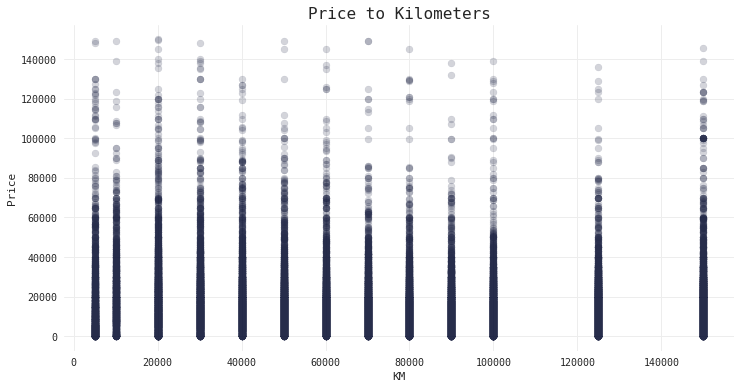

In [15]:
km_price_df = df[['KM', 'Price']][df.Price < 150000]
plt.scatter(km_price_df.KM, km_price_df.Price, color=MC, alpha=.2)
plt.xlabel('KM');
plt.ylabel('Price');
plt.title('Price to Kilometers');

In [16]:
df.columns

Index(['DateCrawled', 'Name', 'Price', 'VehicleType', 'Year', 'Gearbox',
       'PowerPS', 'Model', 'KM', 'Month', 'FuelType', 'Brand',
       'NotRepairedDemage', 'DateCreated', 'PostalCode', 'LastSeen'],
      dtype='object')

# 1. Variable identification
Type of Variable:
    Predictor Variable: Name, VehicleType, Year, Gearbox, PowerPs, Model, KM, Month, FuelType,
                        Brand, NotRepairedDemage
                        
    Target Variable: Price
    
Data Type:

    Datetype: Year, Month, DateCrawled, DateCreated, LastSeen
    String: Name, VehicleType, Gearbox, Model, FuelType, Brand, NotRepairedDemage, PostalCode
    Number: Price, PowerPS, KM
    
Variable Category:

    Categorical: Name, VehicleType, Year, Gearbox, Model, KM, Month, FuelType,
                        Brand, NotRepairedDemage
                        
    Continuous: Price, PowerPS, KM

# 2. Univariate Analysis

### Continuous Variables - Central Tendency
Mean, Median, Mode, Min, Max

In [23]:
df[['Price', 'PowerPS', 'KM']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,"358,191.00","7,479.46","178,589.99",100.00,"1,290.00","3,100.00","7,500.00","74,185,296.00"
PowerPS,"329,336.00",125.43,59.86,25.00,80.00,116.00,150.00,500.00
KM,"371,528.00","125,618.69","40,112.34","5,000.00","125,000.00","150,000.00","150,000.00","150,000.00"


In [71]:
print('Mode')
for col in ['Price', 'PowerPS', 'KM']:
    print('{}: {}'.format(col, df[col].mode().values[0]))

Mode
Price: 500.0
PowerPS: 75.0
KM: 150000


### Continuous Variables - Boxplots and Histograms

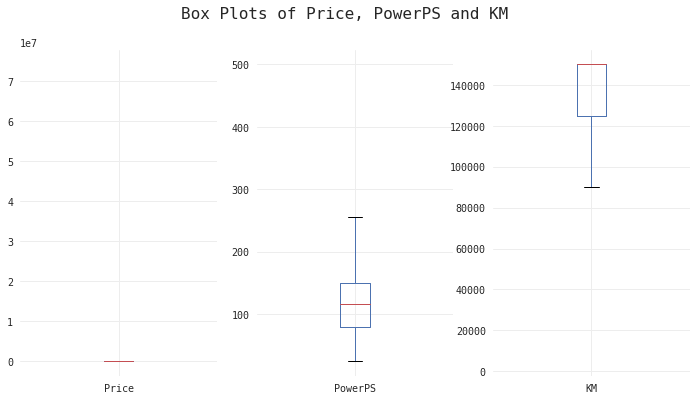

In [105]:
plt.suptitle('Box Plots of Price, PowerPS and KM', fontsize=16)
plt.subplot(1, 3, 1)
df.Price.dropna().plot(kind='box');
plt.subplot(1, 3, 2)
df.PowerPS.dropna().plot(kind='box');
plt.subplot(1, 3, 3)
df.KM.dropna().plot(kind='box');

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


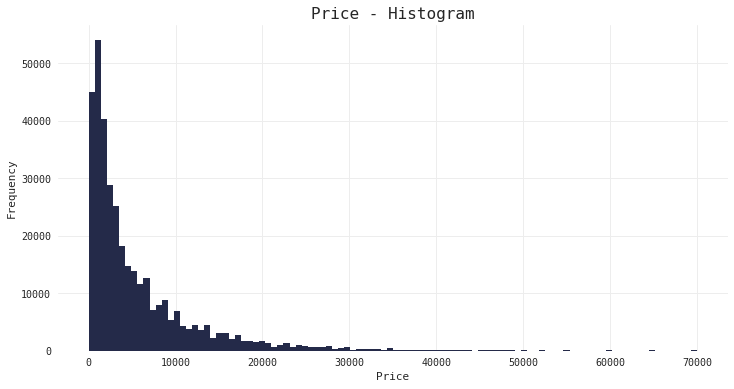

In [12]:
plt.hist(df.Price, range=[10, 70000], bins=100, color=MC);
plt.title('Price - Histogram');
plt.xlabel('Price')
plt.ylabel('Frequency');

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


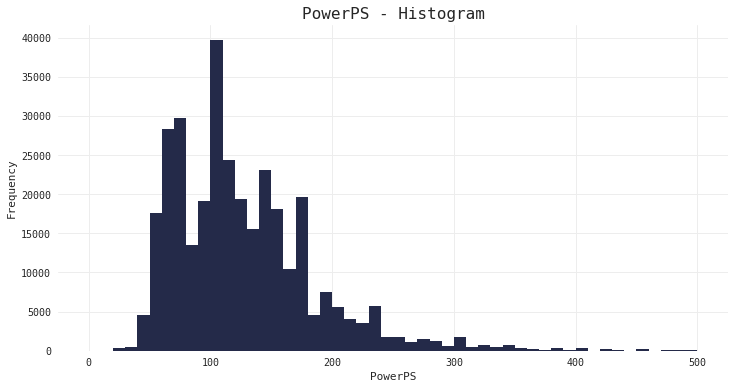

In [13]:
plt.hist(df.PowerPS, range=[0,500], bins=50, color=MC);
plt.title('PowerPS - Histogram');
plt.xlabel('PowerPS')
plt.ylabel('Frequency');

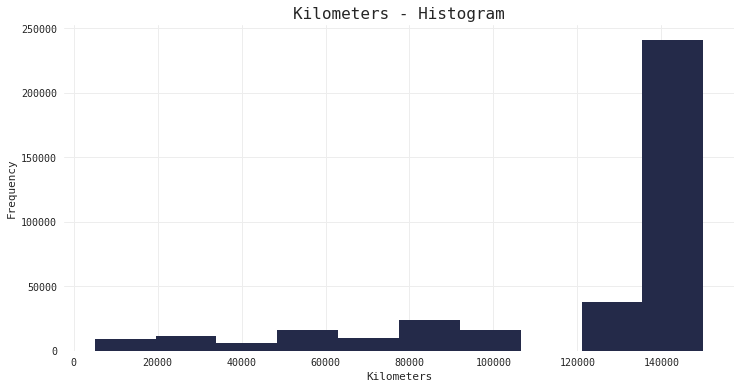

In [101]:
plt.hist(df.KM, color=MC);
plt.title('Kilometers - Histogram');
plt.xlabel('Kilometers')
plt.ylabel('Frequency');

### Categorical Variables 

In [103]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,371528,233531,Ford_Fiesta,657
VehicleType,333659,8,limousine,95894
Gearbox,351319,2,manuell,274214
Model,351044,251,golf,30070
FuelType,338142,7,benzin,223857
Brand,371528,40,volkswagen,79640
NotRepairedDemage,299468,2,nein,263182


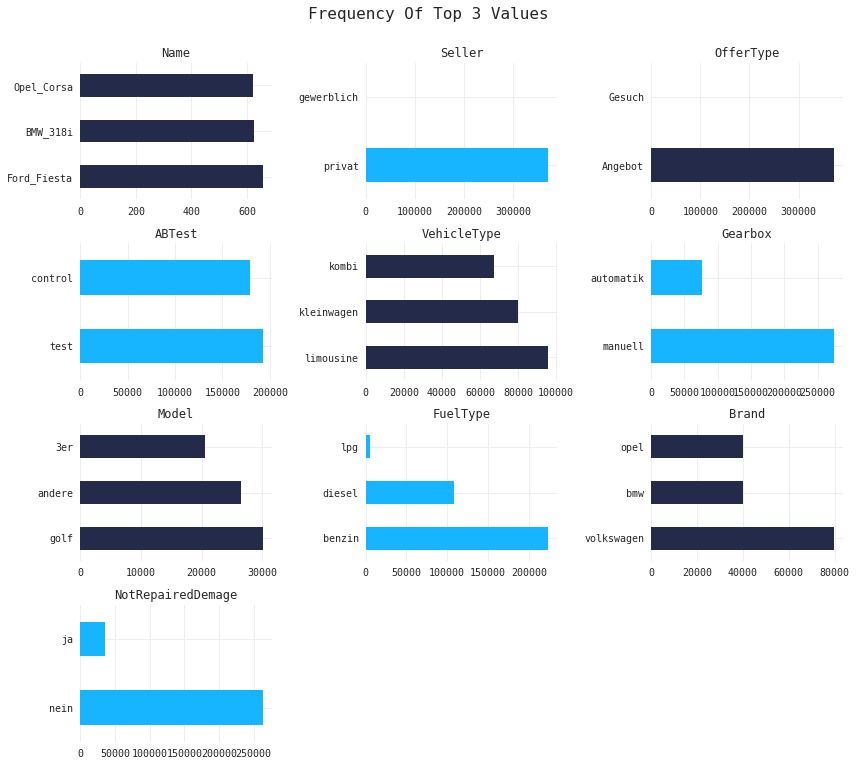

In [8]:
# Checking for top frequnet values
top_range = 3
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
plt.figure(figsize=(12, 20))
plt.suptitle('Frequency Of Top {} Values'.format(top_range), y=1.02, fontsize=16)
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col, fontsize=12)
    df[col].value_counts()[:top_range].plot(kind='barh', color=[colors[0] if i%2 == 0 else colors[1]]);
    plt.tight_layout()